## Machine Learning Foundation With SQLite3



### Learning Objective(s)

 - Create a SQL database connection to a sample SQL database, and read records from that database
 - Explore common input parameters

### Packages

 - [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
 - [Pandas.read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html)
 - [SQLite3](https://docs.python.org/3.6/library/sqlite3.html)

## Simple data reads

Structured Query Language (SQL) is an [ANSI specification](https://docs.oracle.com/database/121/SQLRF/ap_standard_sql001.htm#SQLRF55514), implemented by various databases. SQL is a powerful format for interacting with large databases efficiently, and SQL allows for a consistent experience across a large market of databases. We'll be using sqlite, a lightweight and somewhat restricted version of sql for this example. sqlite uses a slightly modified version of SQL, which may be different than what you're used to. 

In [17]:
# Imports packeges 
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd


### Database connections

Our first step will be to create a connection to our SQL database. A few common SQL databases used with Python include:

 - Microsoft SQL Server
 - Postgres
 - MySQL
 - AWS Redshift
 - AWS Aurora
 - Oracle DB
 - Terradata
 - Db2 Family
 - Many, many others
 
Each of these databases will require a slightly different setup, and may require credentials (username & password), tokens, or other access requirements. We'll be using `sqlite3` to connect to our database, but other connection packages include:

 - [`SQLAlchemy`](https://www.sqlalchemy.org/) (most common)
 - [`psycopg2`](http://initd.org/psycopg/)
 - [`MySQLdb`](http://mysql-python.sourceforge.net/MySQLdb.html)

In [3]:
# Initialize path to SQLite database
path = 'data/classic_rock.db'
con = sq3.Connection(path)

# We now have a live connection to our SQL database

### Reading data

Now that we've got a connection to our database, we can perform queries, and load their results in as Pandas DataFrames


### About the dataset 

The dataset above is about rock and roll music from 1955 to 2014 it contains 1650 rows and 4 columns which are Song, Artist, Release_Year, And Playcount.

In [4]:
# Write a query to view the dataframe
query = '''
SELECT * 
FROM rock_songs;
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head(10)

,Song,Artist,Release_Year,PlayCount
0,Caught Up in You,.38 Special,1982.0,82
1,Hold On Loosely,.38 Special,1981.0,85
2,Rockin' Into the Night,.38 Special,1980.0,18
3,Art For Arts Sake,10cc,1975.0,1
4,Kryptonite,3 Doors Down,2000.0,13
5,Loser,3 Doors Down,2000.0,1
6,When I'm Gone,3 Doors Down,2002.0,6
7,What's Up?,4 Non Blondes,1992.0,3
8,Take On Me,a-ha,1985.0,1
9,Back In Black,AC/DC,1980.0,97


In [5]:
# 2
# Write a query that show the of artist, song, min playcount, avg playcount, and max playcount
query = '''
SELECT 
    COUNT(Distinct Artist) AS total_artists,
    COUNT(Distinct Song) AS num_songs,
    MIN(PlayCount) AS min_playsCount, 
    AVG(PlayCount) AS avg_playsCount, 
    Max(PlayCount) AS max_playsCount  
FROM rock_songs

'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head()

,total_artists,num_songs,min_playsCount,avg_playsCount,max_playsCount
0,385,1621,0,20.332121,142


In [6]:
# Write a query return the number of song and average playcount
query = '''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head()

,Artist,Release_Year,num_songs,avg_plays
0,The Beatles,1967.0,23,6.565217
1,Led Zeppelin,1969.0,18,21.000000
2,The Beatles,1965.0,15,3.800000
3,The Beatles,1968.0,13,13.000000
4,The Beatles,1969.0,13,15.000000


In [7]:
# Write a query return the number of song and artist per year 
query = '''
SELECT Release_Year, count(Distinct Artist) as num_artist, count(*) as num_songs  
    FROM rock_songs
    GROUP BY Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head(10)

,Release_Year,num_artist,num_songs
0,1973.0,48,104
1,1975.0,43,83
2,1977.0,42,82
3,1970.0,41,81
4,1971.0,38,75
5,1969.0,22,72
6,1980.0,44,70
7,1978.0,34,64
8,1979.0,33,63
9,1981.0,39,61


In [8]:

# Write a query that show the top 1 most play Artist and the song
query = '''
SELECT 
     Artist, Song , PlayCount, Release_year
FROM rock_songs
WHERE PlayCount IN (SELECT
                     Max(PlayCount) AS max_playcountt FROM rock_songs)

'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head()

,Artist,Song,PlayCount,Release_Year
0,Aerosmith,Dream On,142,1973.0


In [9]:
# Write a query return the number of song and artist per year 
query = '''
SELECT Release_Year,  count(*) AS num_songs, AVG(PlayCount) AS Avg_playcount
    FROM rock_songs
    WHERE Artist = 'Aerosmith' AND PlayCount > 100
    GROUP BY Release_Year
    ORDER BY avg_playcount DESC
    
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head(10)

,Release_Year,num_songs,Avg_playcount
0,1973.0,1,142.0
1,1975.0,2,123.5


In [10]:
# Write a query to return the 10 top artists 
query = '''

with cte AS (SELECT Artist,  COUNT(Artist) AS appearance
    FROM rock_songs
    GROUP BY Artist ),
    
cte_2 AS (SELECT Artist,
        DENSE_RANK() OVER (ORDER BY appearance DESC) as ranking
    FROM cte) 
SELECT *
FROM cte_2 
WHERE ranking <= 10

'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head(20)

,Artist,ranking
0,The Beatles,1
1,Led Zeppelin,2
2,Rolling Stones,3
3,Pink Floyd,4
4,The Who,5
5,Van Halen,5
6,Aerosmith,6
7,Bruce Springsteen,7
8,AC/DC,8
9,Eagles,8


Same logic will be repeat to find the most listen artist

In [11]:
# Write a query to return the 10 top song
query = '''

with cte AS (SELECT Song,  SUM(PlayCount) AS Total_playcount
    FROM rock_songs
    GROUP BY Song ),
    
cte_2 AS (SELECT Song,
        DENSE_RANK() OVER (ORDER BY Total_playcount DESC) as ranking
    FROM cte) 
SELECT *
FROM cte_2 
WHERE ranking <= 10

'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head(20)

,Song,ranking
0,Dream On,1
1,All Along the Watchtower,2
2,Sweet Emotion,2
3,You Shook Me All Night Long,3
4,Carry On Wayward Son,4
5,More Than a Feeling,4
6,Peace of Mind,5
7,Crazy On You,6
8,Legs,7
9,Sharp Dressed Man,8


In [12]:

# Write a query to return the top 2 songs per artist from the average play list
query = '''

with cte AS (SELECT Artist, Release_Year, Song, AVG(PlayCount) AS avg_plays 
    FROM rock_songs
    GROUP BY Artist, Release_Year),
    
cte_2 AS (SELECT Artist, Song, avg_plays,
        DENSE_RANK() OVER (PARTITION BY Artist ORDER BY avg_plays DESC) as ranking
    FROM cte) 
SELECT *
FROM cte_2 
WHERE ranking <= 2

'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head(20)

,Artist,Song,avg_plays,ranking
0,.38 Special,Hold On Loosely,85.000000,1
1,.38 Special,Caught Up in You,82.000000,2
2,10cc,Art For Arts Sake,1.000000,1
3,3 Doors Down,Kryptonite,7.000000,1
4,3 Doors Down,When I'm Gone,6.000000,2
5,4 Non Blondes,What's Up?,3.000000,1
6,AC/DC,Dirty Deeds Done Dirt Cheap,85.000000,1
7,AC/DC,Back In Black,73.800000,2
8,Ace,How Long,1.000000,1
9,Adelitas Way,Dog On A Leash,4.000000,1


In [13]:
# Write a query to return the 10 top artists per year and the their most playcount top 3 songs
query = '''

with cte as (
  select 
    *,
    rank() over(partition by Artist order by Release_Year, PlayCount) as rnk 
  from 
    rock_songs
)

select Release_Year,Artist,Song,rnk 
from cte
where rnk <= 3


'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head(20)

,Release_Year,Artist,Song,rnk
0,1980.0,.38 Special,Rockin' Into the Night,1
1,1981.0,.38 Special,Hold On Loosely,2
2,1982.0,.38 Special,Caught Up in You,3
3,1975.0,10cc,Art For Arts Sake,1
4,2000.0,3 Doors Down,Loser,1
5,2000.0,3 Doors Down,Kryptonite,2
6,2002.0,3 Doors Down,When I'm Gone,3
7,1992.0,4 Non Blondes,What's Up?,1
8,1975.0,AC/DC,It's A Long Way To The Top,1
9,1975.0,AC/DC,T.N.T.,2


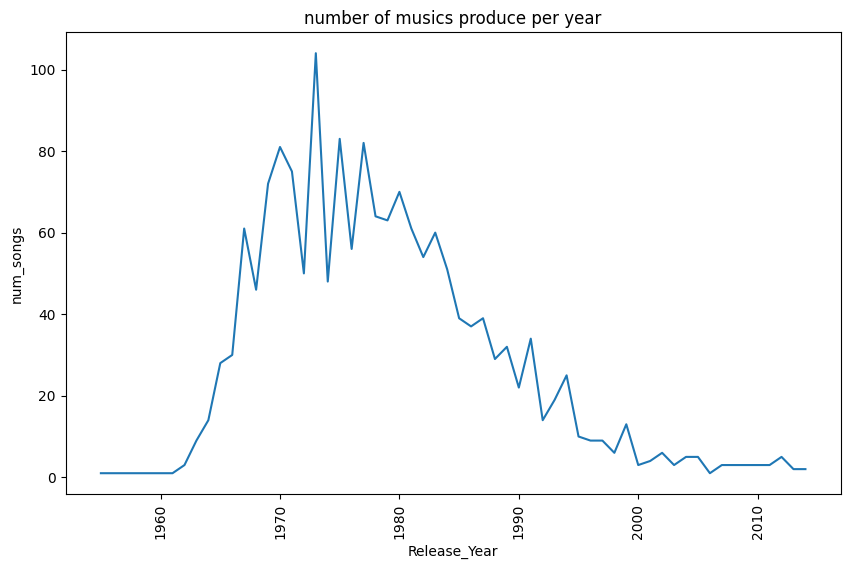

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Write a query to return the 10 top artists per year and the their most playcount top 3 songs
num_songs = '''

  SELECT 
        Release_Year, COUNT(Song) as num_songs
  FROM 
    rock_songs
  GROUP BY Release_Year

'''

# Execute the query
observations = pds.read_sql(num_songs, con)

plt.figure(figsize=(10,6))
sns.lineplot(observations, x ='Release_Year', y = 'num_songs')
plt.title('number of musics produce per year')
plt.xticks(rotation =90 )
plt.show()



## CONCLUSION


In this project, we have learned how to connect the SQLite database with Python.

Also, we've run some queries that provide the most fundamental SQL query and SQL subquery which in return we learned the most insightful result from the dataset provided. 